In [1]:
import numpy as np
from scipy.spatial import distance_matrix
from sklearn.datasets import make_moons

from location_allocation import MaximizeCoverage
import utils

### Generate Dummy Data & Optimize

In [2]:
points, _ = make_moons(300, noise=0.15)
facilities = utils.generate_candidate_facilities(points, 50)
cost_matrix = distance_matrix(points, facilities)

mclp = MaximizeCoverage(
    points,
    facilities,
    cost_matrix,
    cost_cutoff=0.2,
    facilities_to_site=5,
)
mclp.optimize()

Welcome to the CBC MILP Solver 
Version: Trunk
Build Date: Nov 15 2020 

Starting solution of the Linear programming relaxation problem using Primal Simplex

Coin0506I Presolve 201 (-100) rows, 242 (-108) columns and 537 (-108) elements
Clp1000I sum of infeasibilities 0 - average 0, 205 fixed columns
Coin0506I Presolve 0 (-201) rows, 0 (-242) columns and 0 (-537) elements
Clp0000I Optimal - objective value -0
Clp0000I Optimal - objective value -0
Coin0511I After Postsolve, objective 0, infeasibilities - dual 0 (0), primal 0 (0)
Clp0014I Perturbing problem by 0.001% of 1.0164613 - largest nonzero change 9.8276609e-05 ( 0.0098276609%) - largest zero change 0
Clp0000I Optimal - objective value 67
Clp0000I Optimal - objective value 67
Clp0000I Optimal - objective value 67
Coin0511I After Postsolve, objective 67, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective 67 - 0 iterations time 0.012, Presolve 0.00, Idiot 0.01

Starting MIP optimization


### Plot Result

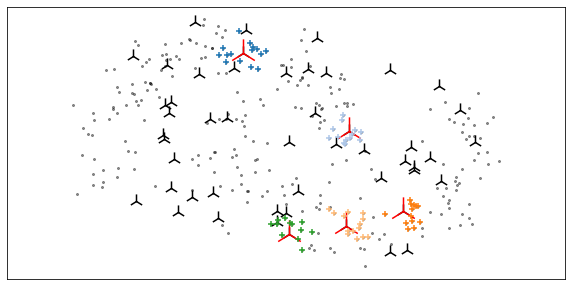

In [3]:
# removing sites from the distance matrix which are not part of the solution
cost_matrix = np.delete(
    cost_matrix,
    [x for x in range(50) if x not in mclp.result.solution["opt_facilities_indexes"]],
    1,
)

point_allocations = {}
for s_idx, x in enumerate(cost_matrix.T):
    point_allocations[mclp.result.solution["opt_facilities_indexes"][s_idx]] = []
    for idx, y in enumerate(x):
        if y == 1.0:
            point_allocations[mclp.result.solution["opt_facilities_indexes"][s_idx]].append(idx)

utils.plot_result(points, point_allocations, mclp.result.solution["opt_facilities"], np.array(facilities))